In [7]:
from utils import read_images, save_min_projection_imgs, extract_labels
import napari
from skimage.measure import regionprops_table
import pandas as pd
import pyclesperanto_prototype as cle

cl.OCLArray([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
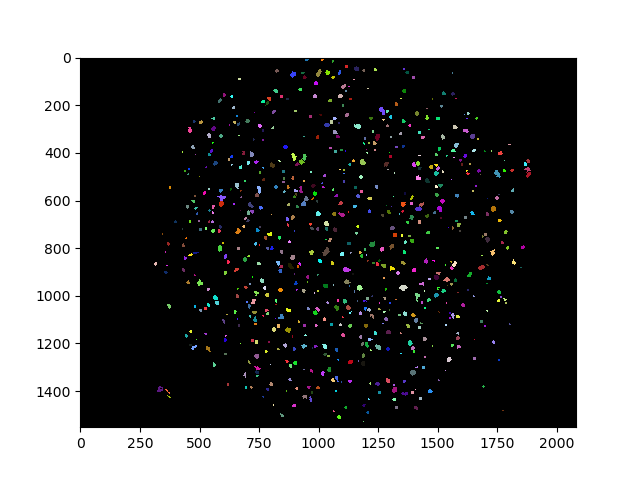

In [8]:
images_per_well = read_images("./data/COLOR_4x_optimal_DoF.2024-02-13-15-22-50")

save_min_projection_imgs(images_per_well)

image_path = './output/MIN_projections/A01.tif'

image_gray_uint8, result_image, output_labels = extract_labels(image_path)

viewer = napari.Viewer(ndisplay=2)
viewer.add_image(image_gray_uint8, name=f"grayscale")
viewer.add_image(result_image, name=f"illumination_correction")
viewer.add_labels(output_labels, name=f"labels")

output_labels

In [10]:
output_labels = cle.pull(output_labels)

props = regionprops_table(label_image = output_labels, intensity_image=image_gray_uint8, properties=["label", "area_filled", "intensity_mean", "perimeter", "solidity"])

data = pd.DataFrame(props)

data

,label,area_filled,intensity_mean,perimeter,solidity
0,1,143.0,81.566434,43.071068,0.986207
1,2,108.0,82.990741,35.899495,0.981818
2,3,101.0,87.534653,34.727922,0.952830
3,4,151.0,83.211921,43.313708,0.967949
4,5,108.0,91.203704,36.142136,0.955752
...,...,...,...,...,...
702,703,64.0,90.062500,29.899495,0.914286
703,704,122.0,88.401639,38.142136,0.976000
704,705,199.0,74.874372,52.970563,0.947619
705,706,257.0,77.735409,57.455844,0.966165
